In [2]:
from google.colab import files
file=files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
data['Certificate'].ffill(inplace=True)

In [6]:
mean_metaScore=data['Meta_score'].mean()

In [7]:
data['Meta_score'].fillna(round(mean_metaScore,1),inplace=True)

In [8]:
data['Gross'] = data['Gross'].str.replace(',', '', regex=True)
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce').fillna(0).astype(int)

In [9]:
data['Runtime'] = data['Runtime'].str.split(expand=True)[0].astype(int)
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,Passed,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 125.1+ KB


In [27]:
#What are the top-rated movies in the dataset, and who directed them
directed_movie=data.sort_values('IMDB_Rating',ascending=False)
directed_movie[['Series_Title','Director']].head()

,Series_Title,Director
0,The Shawshank Redemption,Frank Darabont
1,The Godfather,Francis Ford Coppola
2,The Dark Knight,Christopher Nolan
3,The Godfather: Part II,Francis Ford Coppola
4,12 Angry Men,Sidney Lumet


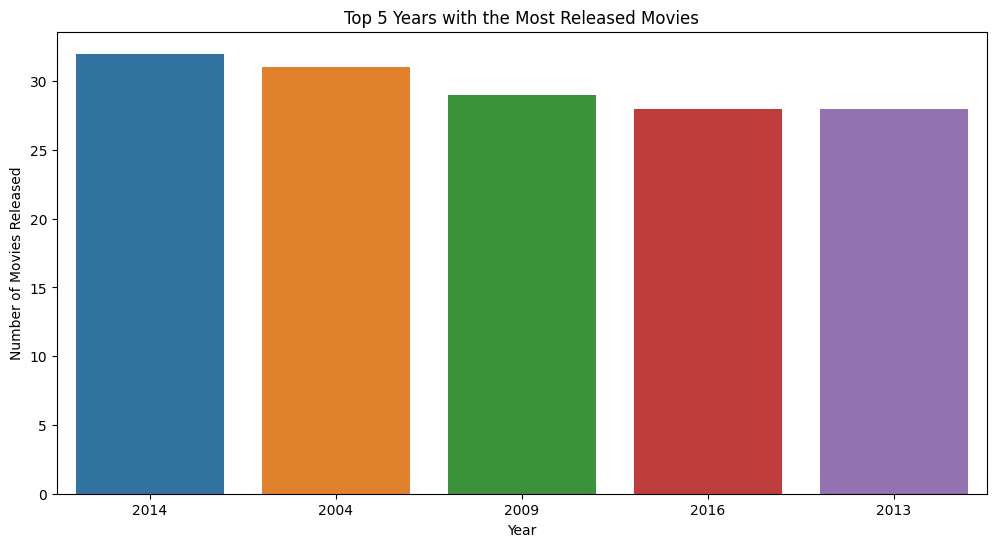

In [11]:
#To display the top 5 years with the highest number of movies released
top_years=data['Released_Year'].value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_years.index, y=top_years.values)
plt.title('Top 5 Years with the Most Released Movies')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.show()

In [12]:
#Analyze how movies directed by different directors perform in terms of gross earnings
director_performance = data.groupby(['Director', 'Genre'])['Gross'].mean().reset_index()
director_performance.sort_values('Gross',ascending=False).head(10)


,Director,Genre,Gross
77,Anthony Russo,"Action, Adventure, Drama",8.583730e+08
365,James Cameron,"Action, Adventure, Fantasy",7.605076e+08
368,James Cameron,"Drama, Romance",6.593254e+08
152,Christopher Nolan,"Action, Crime, Drama",5.348584e+08
281,Gareth Edwards,"Action, Adventure, Sci-Fi",5.321773e+08
358,J.J. Abrams,"Action, Adventure, Sci-Fi",4.743903e+08
78,Anthony Russo,"Action, Adventure, Sci-Fi",4.488888e+08
797,Steven Spielberg,"Family, Sci-Fi",4.351106e+08
460,Josh Cooley,"Animation, Adventure, Comedy",4.340380e+08
709,Roger Allers,"Animation, Adventure, Drama",4.227838e+08


In [ ]:
#James Cameron is successful in genres such as Action, Adventure, Fantasy, and Drama, Romance, with 7.605076e+08 and 6.593254e+08 average gross earnings

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


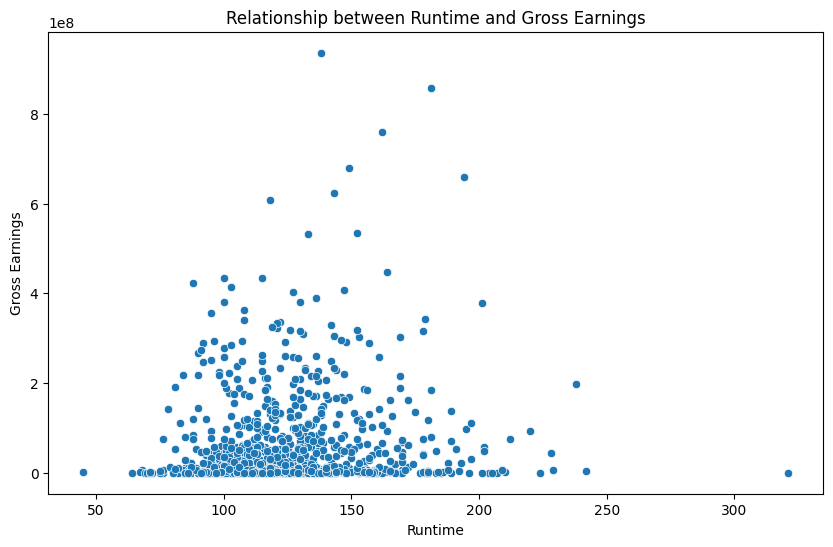

In [29]:
#Is there a correlation between the movie's runtime and Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime',y='Gross', data=data, cmap='viridis')
plt.title("Relationship between Runtime and Gross Earnings")
plt.xlabel('Runtime')
plt.ylabel('Gross Earnings')
plt.show()

In [16]:
#which movie got highest number of votes
Title_movie=data.sort_values('No_of_Votes',ascending=False).iloc[0]
print("The movie with the highest number of votes is:",Title_movie['Series_Title'])


The movie with the highest number of votes is: The Shawshank Redemption


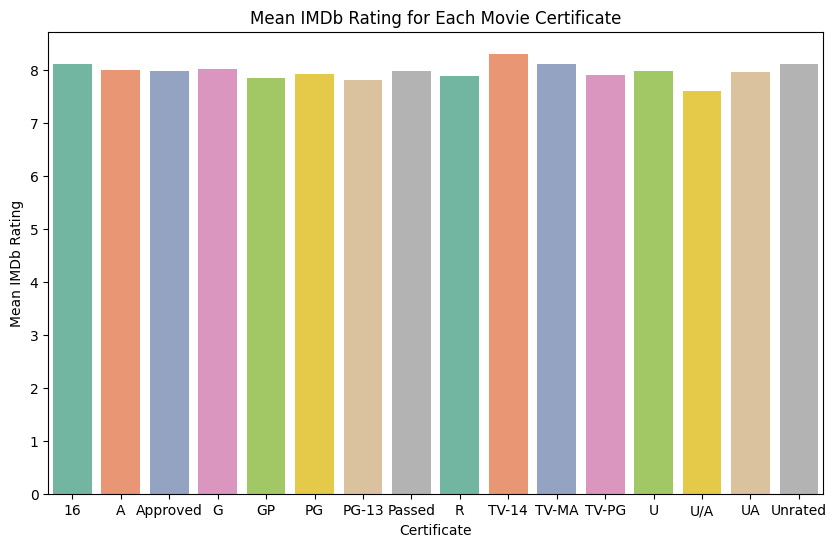

In [17]:
# IMDb rating for each certificate category. (e.g., 'G', 'PG', 'R')
mean_ratings_by_certificate = data.groupby('Certificate')['IMDB_Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Certificate', y='IMDB_Rating', data=mean_ratings_by_certificate, palette='Set2')
plt.title("Mean IMDb Rating for Each Movie Certificate")
plt.xlabel('Certificate')
plt.ylabel('Mean IMDb Rating')
plt.show()


In [18]:
#To display the summery of movie

series=str(input())
series=data[data['Series_Title']==series]
series[['Series_Title','Released_Year','Director','Overview']]

The Shawshank Redemption


,Series_Title,Released_Year,Director,Overview
0,The Shawshank Redemption,1994,Frank Darabont,Two imprisoned men bond over a number of years...


In [33]:
#Which genres are most common among the top-rated movies?

# data.sort_values('IMDB_Rating',ascending=False)['Genre'].value_counts().head()
top_rated_movies = data.sort_values('IMDB_Rating', ascending=False)
top_genres = top_rated_movies['Genre'].value_counts().head()
top_genres

Drama                     85
Drama, Romance            37
Comedy, Drama             35
Comedy, Drama, Romance    31
Action, Crime, Drama      30
Name: Genre, dtype: int64

In [24]:
#The director who directed the most movies
s1=data.groupby('Director')['Series_Title'].count()
print("The Director Published movies:",s1.sort_values(ascending=False).head(1))

The Director Published movies: Director
Alfred Hitchcock    14
Name: Series_Title, dtype: int64


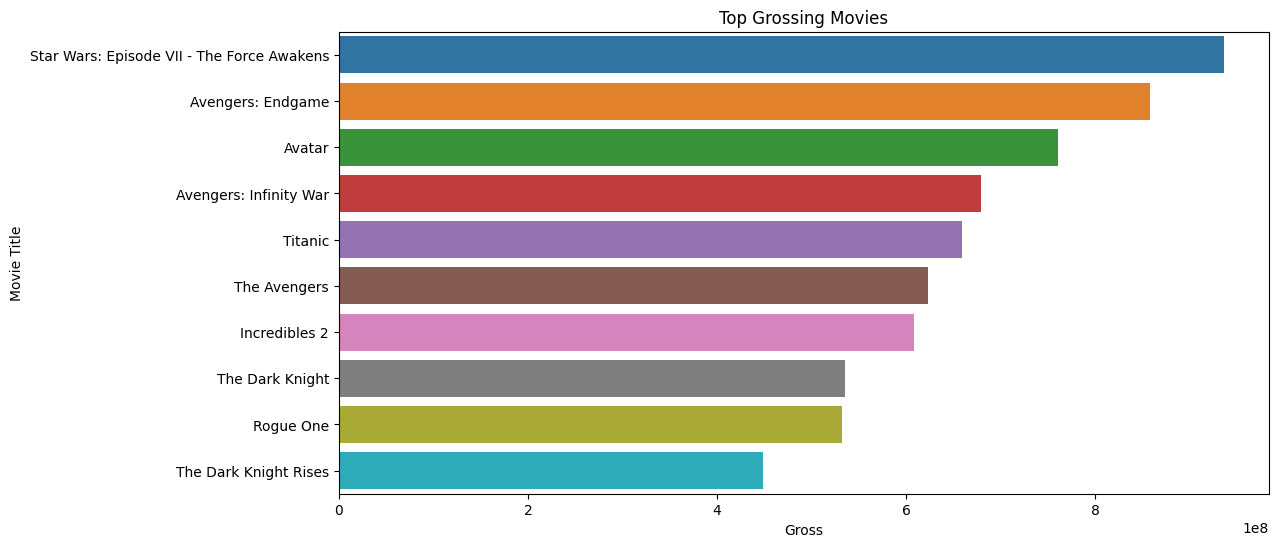

In [54]:
#The top-grossing movies in the dataset
top_grossing_movies = data.sort_values('Gross', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_grossing_movies['Gross'], y=top_grossing_movies['Series_Title'])
plt.title('Top Grossing Movies')
plt.xlabel('Gross')
plt.ylabel('Movie Title')
plt.show()

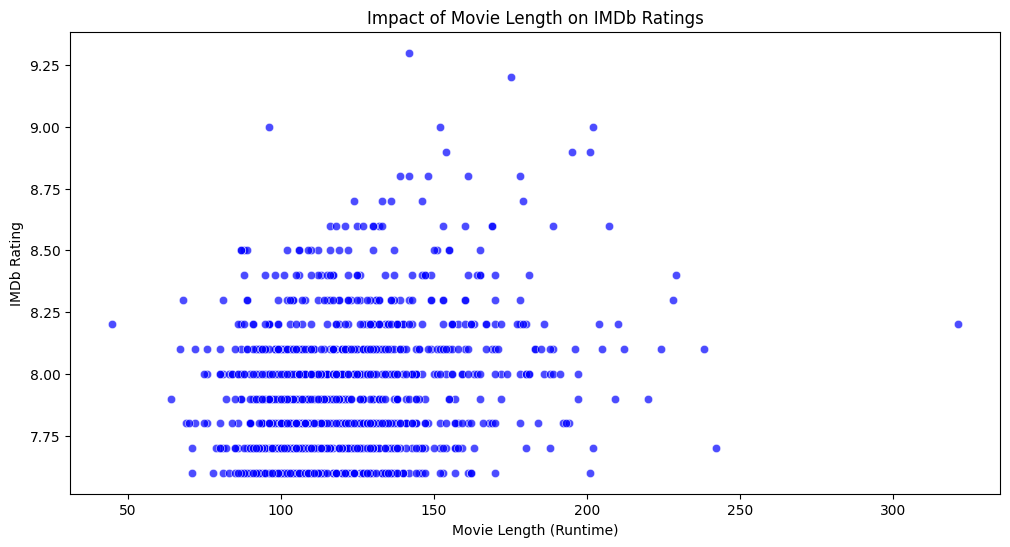

In [21]:
#Impact of Movie Length on Ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=data, color='blue', alpha=0.7)
plt.title("Impact of Movie Length on IMDb Ratings")
plt.xlabel('Movie Length (Runtime)')
plt.ylabel('IMDb Rating')
plt.show()

